In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_excel('data/Monthly Mastersheet.xlsx')

print(df.shape)

# Identify numeric columns only (excludes datetime, strings, etc.)
# added this
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("Numeric columns for PCA:", numeric_cols)


scaler = StandardScaler()
scaled_array = scaler.fit_transform(df[numeric_cols])

scaled_df = pd.DataFrame(scaled_array, columns=numeric_cols, index=df.index)
# changed this part  up

print(scaled_df.shape)


print(scaled_df)

print(scaled_df.dtypes)
print(scaled_df.isnull().sum())

print("Before NA drop : " + str(scaled_df.shape))
scaled_df = scaled_df.dropna()
print("AFTER NA drop : " + str(scaled_df.shape))

print(scaled_df.shape)


(89, 36)
Numeric columns for PCA: Index(['Bitcoin', 'Tether', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin',
       'Cardano', 'USD Coin', 'VIX', 'MOVE', 'LFPR', 'CPI', 'r', 'M1', 'GDP',
       'IM', 'EX', 'CC', 'CC Monthly % Change', 'Bitcoin Price', 'GDP Monthly',
       'vol_LFPR', 'vol_CPI', 'vol_r', 'vol_M1', 'vol_GDP', 'vol_IM', 'vol_EX',
       'vol_CC', 'PC1_macro', 'PC2_macro', 'PC1_crypto', 'PC2_crypto',
       'PC1_macro.1', 'PC2_macro.1'],
      dtype='object')
(89, 35)
     Bitcoin    Tether  Litecoin       XRP  Ethereum  Dogecoin   Cardano  \
0   0.916357  1.020463  0.938104  1.000136  0.459811 -0.144167       NaN   
1   1.063206  1.094440  1.569994  0.533519  1.651319  1.243562       NaN   
2   0.362260  0.862752 -0.094169  0.445469 -0.815504 -0.094026       NaN   
3   1.240928  2.069150  0.723540  0.327256  0.485816  0.893431       NaN   
4   2.168643  1.908262  2.872895  2.772039  1.717196  1.436135       NaN   
..       ...       ...       ...       ...       ...       ..

In [5]:
macro_vars = ['LFPR', 'CPI', 'r', 'M1', 'GDP Monthly', 'IM', 'EX', 'CC']

pca = PCA(n_components=8)

my_data_df_scaled_PCA = pca.fit_transform(scaled_df[macro_vars])


pca_df = pd.DataFrame(my_data_df_scaled_PCA, columns=[f'PC{i+1}' for i in range(8)], index=scaled_df.index)


print(pca_df)



explained_var = pca.explained_variance_
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)

summary_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_var))],
    'Eigenvalue': explained_var,
    'Explained Variance (%)': explained_var_ratio * 100,
    'Cumulative Variance (%)': cumulative_var_ratio * 100
})

print(summary_df)


         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
16 -2.006897  2.223246 -0.133781 -0.531600 -0.094064 -0.250613 -0.106001   
17 -2.048860  2.295808 -0.131366 -0.412048 -0.149045 -0.266404 -0.007206   
18 -2.104305  2.315510 -0.080848 -0.097886 -0.296268 -0.263867  0.046310   
19 -2.051015  2.047337  0.019121 -0.043377 -0.469193 -0.227551 -0.035512   
20 -2.054379  2.237132 -0.059464  0.078713 -0.421252 -0.214923  0.037871   
..       ...       ...       ...       ...       ...       ...       ...   
84  2.989840  0.432218  0.194180  0.268406 -0.101956  0.144746  0.005424   
85  2.901449  0.174891  0.202934  0.431219 -0.235032  0.248376 -0.092886   
86  2.864278  0.170136  0.115936  0.531751 -0.227923  0.273923 -0.085102   
87  2.779402  0.194783  0.048345  0.627588 -0.264491  0.248511  0.011411   
88  3.300513  0.163490 -0.413559  0.484999 -0.532219  0.198495  0.050911   

         PC8  
16 -0.085233  
17 -0.080989  
18 -0.052873  
19 -0.053575  
20 -0.056260

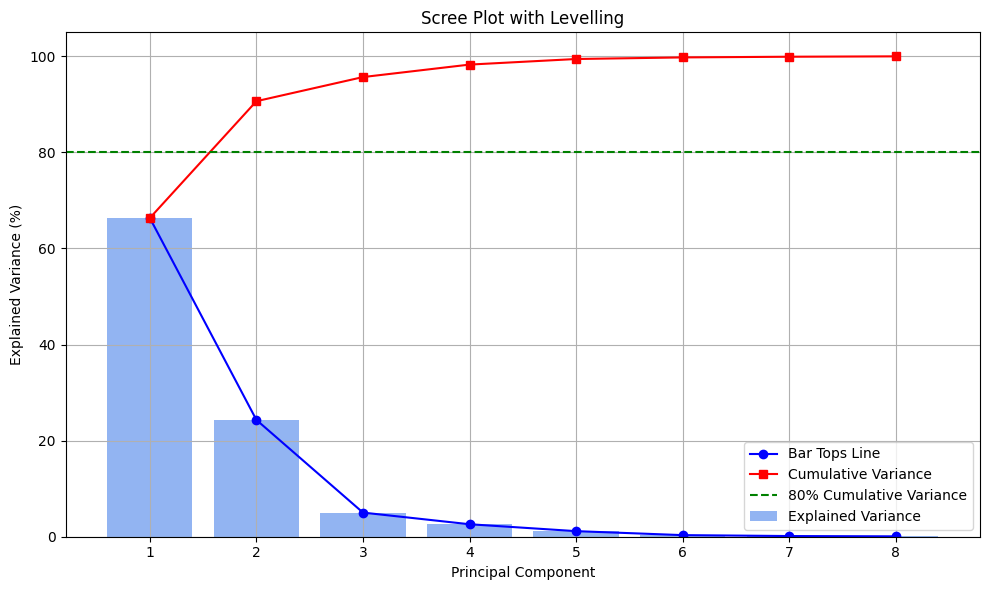

In [ ]:

explained_variance_ratio = pca.explained_variance_ratio_[:20]
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components = len(explained_variance_ratio)
avg_explained = 1.0 / n_components  # average variance threshold

x_vals = np.arange(1, n_components + 1)
y_vals = explained_variance_ratio * 100

plt.figure(figsize=(10, 6))

plt.bar(x_vals, y_vals, alpha=0.7, color='cornflowerblue', label='Explained Variance')

plt.plot(x_vals, y_vals, marker='o', color='blue', label='Bar Tops Line')

plt.plot(x_vals, cumulative_variance * 100, marker='s', color='red', label='Cumulative Variance')

# 80% line
plt.axhline(y=80, color='green', linestyle='--', label='80% Cumulative Variance')

# Plot formatting
plt.title('Scree Plot with Levelling')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.xticks(x_vals)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
#added this
loading_df = pd.DataFrame(
    pca.components_.T,
    index=macro_vars,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)]
)

cutoff = 0.5

filtered_loading_df = loading_df[(loading_df.abs() >= cutoff).any(axis=1)]

print(filtered_loading_df)

pc = 'PC1'
print(filtered_loading_df[pc].sort_values(key=abs, ascending=False))

                  PC1       PC2       PC3       PC4       PC5       PC6  \
LFPR         0.167143  0.667861 -0.351227 -0.252165  0.539928  0.017454   
CPI          0.401342 -0.092903  0.237038  0.074254 -0.070549  0.593239   
r            0.383779  0.324905  0.758607 -0.023609 -0.003900 -0.367897   
M1           0.210546 -0.492762 -0.068612  0.292088  0.544069 -0.487323   
GDP Monthly  0.397951  0.005761 -0.081896  0.480485  0.266573  0.391304   
IM           0.435786 -0.068537 -0.395115  0.018511 -0.400379 -0.148629   
EX           0.459357  0.082393 -0.270568 -0.106917 -0.353077 -0.274880   
CC          -0.245131  0.430621 -0.065042  0.776135 -0.226818 -0.155446   

                  PC7       PC8  
LFPR         0.201020 -0.082719  
CPI          0.639853  0.047668  
r           -0.120309 -0.145843  
M1           0.298164  0.020892  
GDP Monthly -0.612622  0.067404  
IM           0.005471 -0.683016  
EX          -0.000137  0.705225  
CC           0.267334  0.027976  
EX             0.4